# Data Preprocessing

In [1]:
import os
import sys
path_to_cv_module = r'c:\users\srish\appdata\local\programs\python\python39\lib\site-packages'
sys.path.append(path_to_cv_module)

In [2]:
import cv2
from tqdm import tqdm

In [3]:
EXTRACT = False

files = r'deepfake-detection-challenge\train_sample_videos'
frames = r'frames'
def get_frames(files, frame_path, ext):
    count = 0
    for f in tqdm(os.listdir(files)):
        if 'mp4' in f:
            try:
                path = os.path.join(files, f)
                cap = cv2.VideoCapture(path)
                n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                fps = int(cap.get(cv2.CAP_PROP_FPS))
                
                count += 1
                # print(n_frames, fps)    # 300, 29 for all videos; all videos are ~10s long
                
                framess = os.path.join(frame_path, f.split('.')[0])
                n = 0
                while True:
                    ret, frame = cap.read()
                    cv2.imwrite('{}_{}.{}'.format(framess, str(n).zfill(len(str(n_frames))), ext), frame)
                    n += 1
            except Exception as e:
                pass

        print(path)
        print(count)
if EXTRACT:
    get_frames(files, frames, 'jpg')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train_data = pd.read_json('deepfake-detection-challenge/train_sample_videos/metadata.json')
train_data.head()

,aagfhgtpmv.mp4,aapnvogymq.mp4,abarnvbtwb.mp4,abofeumbvv.mp4,abqwwspghj.mp4,acifjvzvpm.mp4,acqfdwsrhi.mp4,acxnxvbsxk.mp4,acxwigylke.mp4,aczrgyricp.mp4,...,esnntzzajv.mp4,esxrvsgpvb.mp4,esyhwdfnxs.mp4,esyrimvzsa.mp4,etdcqxabww.mp4,etejaapnxh.mp4,etmcruaihe.mp4,etohcvnzbj.mp4,eudeqjhdfd.mp4,eukvucdetx.mp4
label,FAKE,FAKE,REAL,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,...,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,REAL,FAKE
split,train,train,train,train,train,train,train,train,train,train,...,train,train,train,train,train,train,train,train,train,train
original,vudstovrck.mp4,jdubbvfswz.mp4,None,atvmxvwyns.mp4,qzimuostzz.mp4,kbvibjhfzo.mp4,ccfoszqabv.mp4,fjlyaizcwc.mp4,ffcwhpnpuw.mp4,slwkmefgde.mp4,...,ybetenmsye.mp4,gomwfvijiv.mp4,qeumxirsme.mp4,qzklcjjxdq.mp4,gipbyjfxfp.mp4,wtreibcmgm.mp4,afoovlsmtx.mp4,bdnaqemxmr.mp4,None,gjypopglvi.mp4


In [9]:
train_data = train_data.transpose()
train_data.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [12]:
set(train_data['split'])

{'train'}

In [15]:
train_data.drop(columns = 'split', inplace = True)

In [16]:
train_data.head()

,label,original
aagfhgtpmv.mp4,FAKE,vudstovrck.mp4
aapnvogymq.mp4,FAKE,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,None
abofeumbvv.mp4,FAKE,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,qzimuostzz.mp4


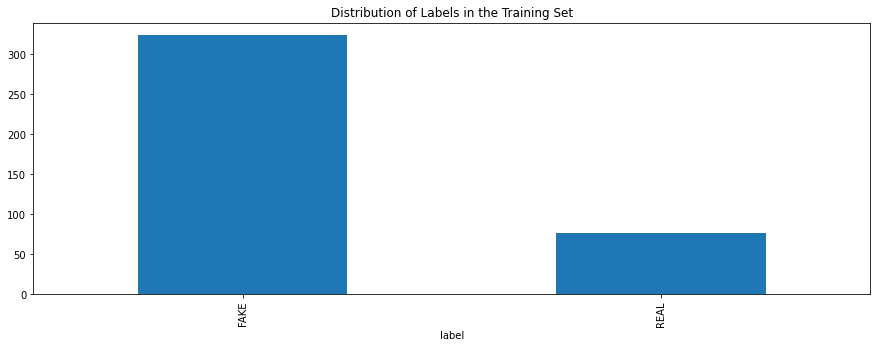

In [10]:
train_data.groupby('label')['label'].count().plot(figsize=(15, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()